In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf

In [2]:
data=pd.read_csv('./ChessKnight.csv',header=None).values
data=np.unique(data,axis=0)
x_all=data[:,:8]
t_all=data[:,8]
t_all=np.eye(t_all.max()+1)[t_all]
len_all=len(x_all)
len_all

499723

In [3]:
permu=np.random.permutation(len_all)
x_all=x_all[permu]
t_all=t_all[permu]
cuts=(0.7,0.85)
x_train=x_all[:int(cuts[0]*len_all)]
t_train=t_all[:int(cuts[0]*len_all)]
x_val=x_all[int(cuts[0]*len_all):int(cuts[1]*len_all)]
t_val=t_all[int(cuts[0]*len_all):int(cuts[1]*len_all)]
x_test=x_all[int(cuts[1]*len_all):]
t_test=t_all[int(cuts[1]*len_all):]
(np.abs(np.full(len(t_test),data[:,8].mean())-t_test.argmax(axis=1))<=2).sum()/len(t_test)

0.3528595632278979

In [4]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(60,activation='relu',input_shape=(x_all.shape[1],)))
model.add(tf.keras.layers.Dense(80,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(60,activation='sigmoid'))
model.add(tf.keras.layers.Dense(t_all.shape[1],activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss=tf.keras.losses.CategoricalCrossentropy(),metrics=[tf.keras.losses.CategoricalCrossentropy()]) # Adam(0.001)/CategoricalCrossentropy

In [5]:
history=model.fit(x_train,t_train,batch_size=x_train.shape[0]//100,epochs=60,validation_data=(x_val,t_val))

Epoch 1/60
101/101 [==============================] - 1s 11ms/step - loss: 2.9776 - categorical_crossentropy: 2.9728 - val_loss: 3.5106 - val_categorical_crossentropy: 3.5097
Epoch 2/60
101/101 [==============================] - 1s 9ms/step - loss: 2.2429 - categorical_crossentropy: 2.2464 - val_loss: 3.1018 - val_categorical_crossentropy: 3.1009
Epoch 3/60
101/101 [==============================] - 1s 10ms/step - loss: 2.1152 - categorical_crossentropy: 2.1162 - val_loss: 2.5229 - val_categorical_crossentropy: 2.5225
Epoch 4/60
101/101 [==============================] - 1s 11ms/step - loss: 2.0539 - categorical_crossentropy: 2.0519 - val_loss: 2.1575 - val_categorical_crossentropy: 2.1574
Epoch 5/60
101/101 [==============================] - 1s 13ms/step - loss: 2.0176 - categorical_crossentropy: 2.0184 - val_loss: 2.0407 - val_categorical_crossentropy: 2.0406
Epoch 6/60
101/101 [==============================] - 1s 12ms/step - loss: 2.0009 - categorical_crossentropy: 2.0003 - val_los

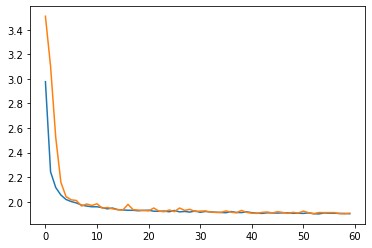

In [6]:
maximum=0
plt.plot(history.history['loss'][maximum:])
plt.plot(history.history['val_loss'][maximum:])

In [7]:
predicted_pre=model.predict(x_test)
predicted=predicted_pre.argmax(axis=1)
predicted

array([17, 26, 30, ..., 28, 29, 24])

In [8]:
t_test.argmax(axis=1)

array([15, 25, 29, ..., 28, 27, 25])

In [9]:
(np.abs(predicted-t_test.argmax(axis=1))<=2).sum()/len(t_test)

0.865313037793994

In [10]:
dict(zip(list(np.unique(predicted-t_test.argmax(axis=1),return_counts=True)[0]),list(np.unique(predicted-t_test.argmax(axis=1),return_counts=True)[1])))

{-6: 10,
 -5: 72,
 -4: 607,
 -3: 3033,
 -2: 8262,
 -1: 14708,
 0: 17943,
 1: 14925,
 2: 9025,
 3: 4313,
 4: 1517,
 5: 392,
 6: 116,
 7: 26,
 8: 6,
 9: 1,
 10: 1,
 11: 2}

In [15]:
# model.save('model (DNN).h5')